# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [2]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


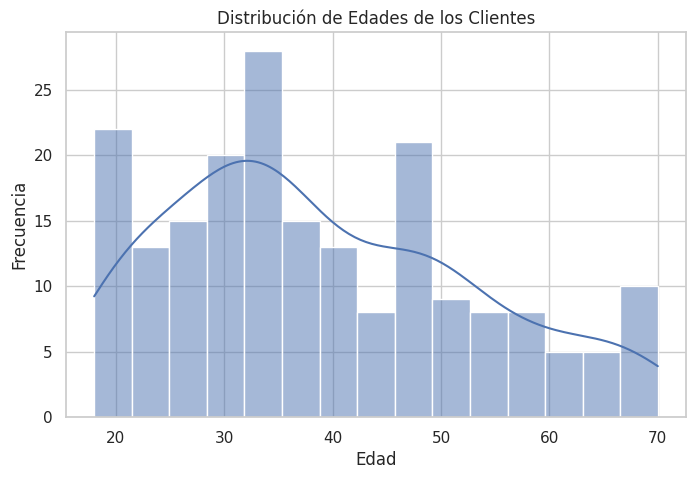

In [19]:
df = pd.read_csv('./data/retailmax.csv')
df.info()

# Configuración de estilo
sns.set(style="whitegrid")

# Crear histograma de edades
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True)

# Títulos y etiquetas
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar gráfica
plt.show()


### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

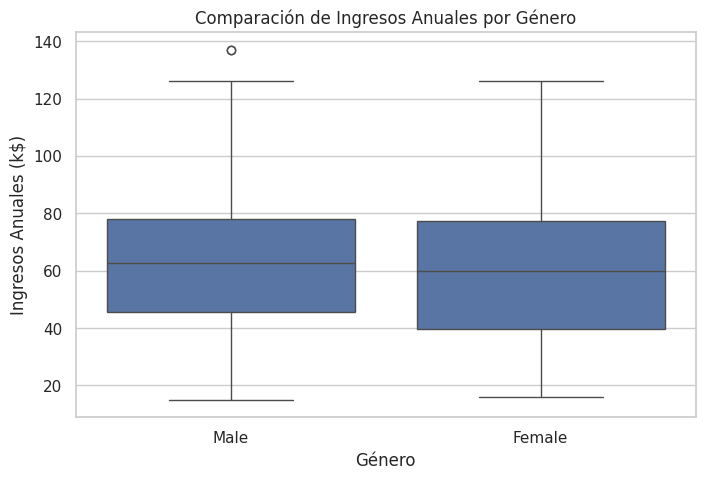

In [12]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear boxplot de ingresos anuales por género
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)

# Títulos y etiquetas
plt.title('Comparación de Ingresos Anuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Anuales (k$)')

# Mostrar gráfica
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

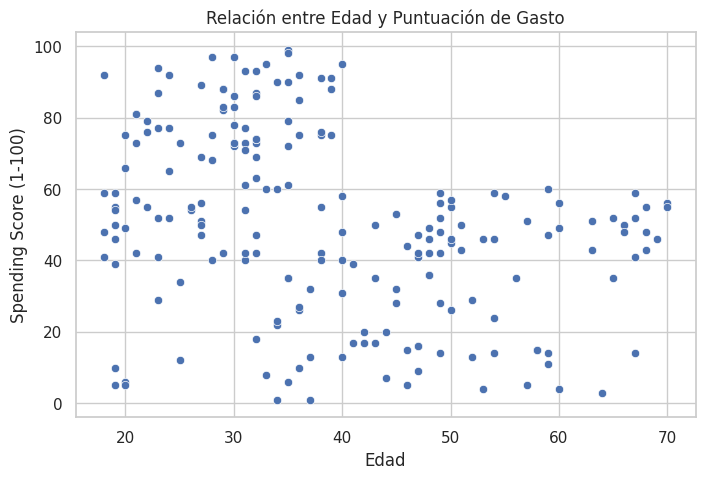

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)

plt.title('Relación entre Edad y Puntuación de Gasto')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

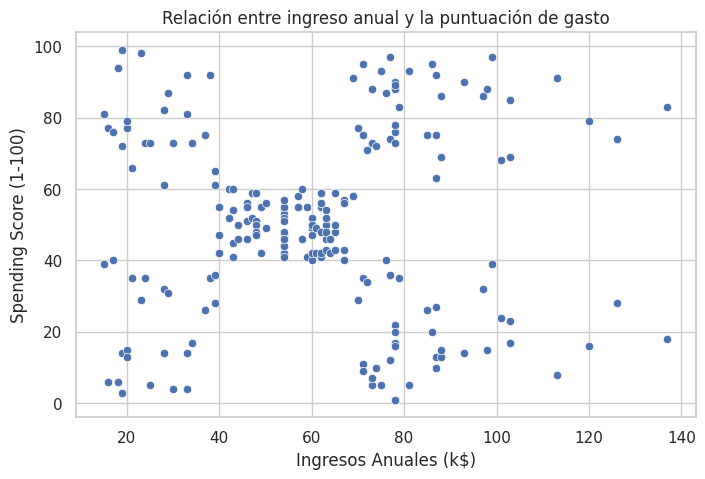

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

plt.title('Relación entre ingreso anual y la puntuación de gasto')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

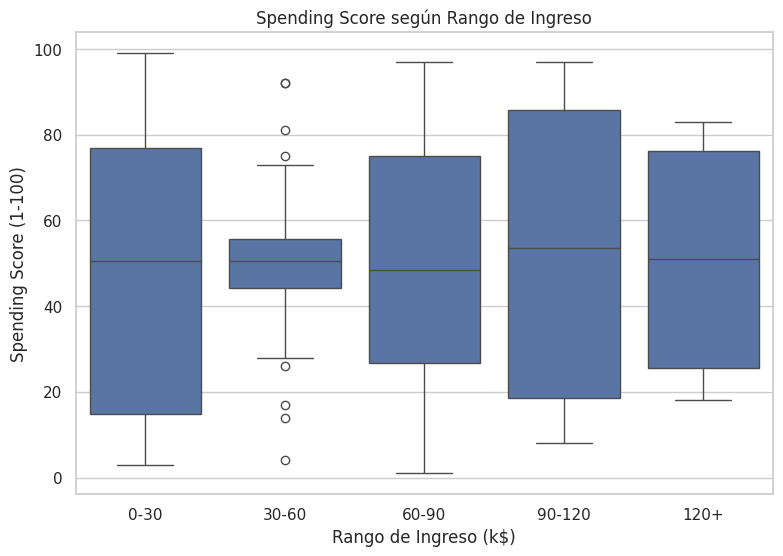

In [17]:
df['Income Group'] = pd.cut(
    df['Annual Income (k$)'],
    bins=[0, 30, 60, 90, 120, 200],
    labels=['0-30', '30-60', '60-90', '90-120', '120+']
)

sns.set(style="whitegrid")

plt.figure(figsize=(9, 6))
sns.boxplot(
    x='Income Group',
    y='Spending Score (1-100)',
    data=df
)

plt.title('Spending Score según Rango de Ingreso')
plt.xlabel('Rango de Ingreso (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

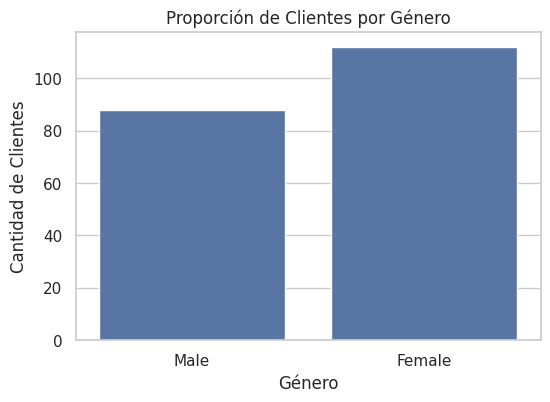

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Proporción de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

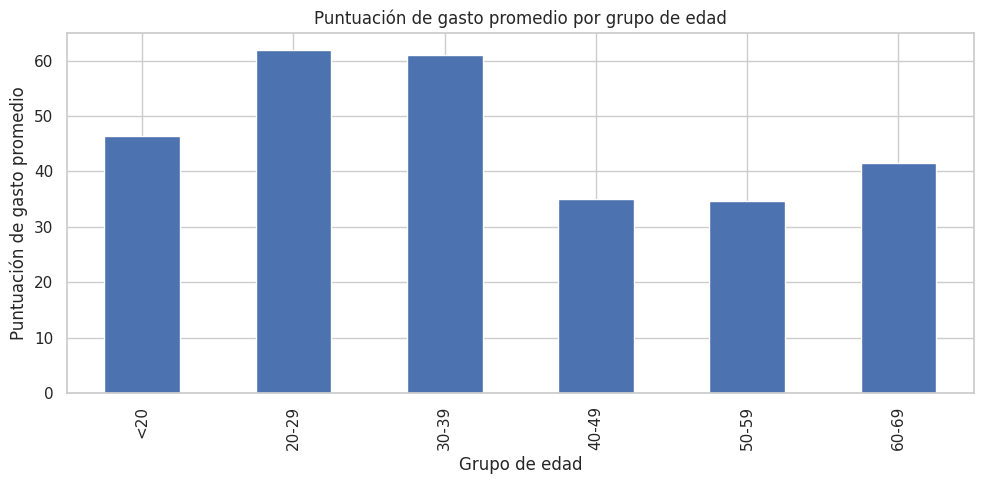

In [20]:
#Rangos de edad
rango_e = [0,20,30,40,50,+60,70]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69"]
df["AgeGroup"] = pd.cut(df["Age"], bins=rango_e, labels=labels, right=False)

# Cálculo del promedio de gasto por grupo de edad
age_group_avg = df.groupby("AgeGroup")["Spending Score (1-100)"].mean()

# Gráfica de barras
plt.figure(figsize=(10, 5))
age_group_avg.plot(kind="bar")

plt.title("Puntuación de gasto promedio por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Puntuación de gasto promedio")
plt.tight_layout()
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

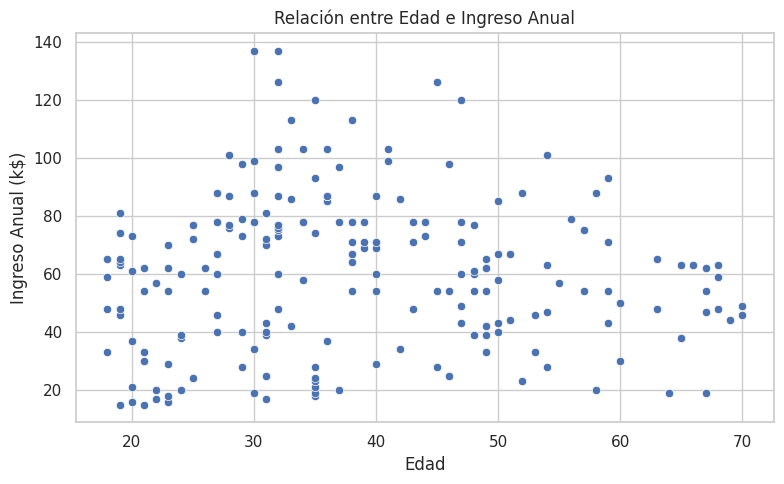

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')

plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

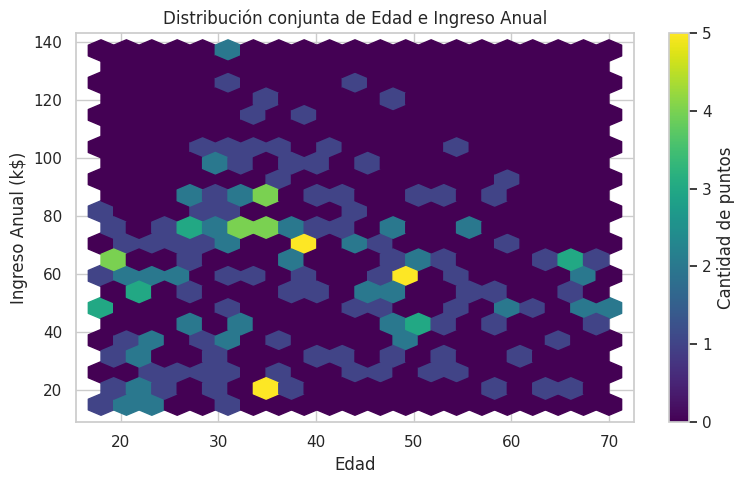

In [24]:

plt.figure(figsize=(8, 5))
plt.hexbin(df['Age'], df['Annual Income (k$)'], gridsize=20, cmap='viridis')

plt.colorbar(label='Cantidad de puntos')
plt.title('Distribución conjunta de Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.tight_layout()
plt.show()


### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

In [ ]:


plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)',
    palette='Set2'
)

plt.title('Distribución de la Puntuación de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()
